# Оглавление

1. [Данные](#task1)       
2. [LDA-модель](#task2)    
3. [Логистическая модель](#task3)  
4. [Кластеризация](#task4)
5. [Решающие деревья](#task5)

In [86]:
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors

In [46]:
cmap = colors.LinearSegmentedColormap(
    'red_blue_classes',
    {'red': [(0, 1, 1), (1, 0.7, 0.7)],
     'green': [(0, 0.7, 0.7), (1, 0.7, 0.7)],
     'blue': [(0, 0.7, 0.7), (1, 1, 1)]})
plt.cm.register_cmap(cmap=cmap)

# Данные
<a id='task1'></a>

In [47]:
iris = load_iris()

In [48]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [49]:
# загружаем данные в датафрейм

data = pd.DataFrame(iris.data, columns=iris.feature_names)
variety = iris.target

In [50]:
# усовершенствуем названия столбцов для удобной работы с ними, заменим пробел на нижнее подчеркивание

for col in data.columns :
    if ' ' in col:
        data.rename({col:col.replace(' ', '_')}, inplace=True, axis=1)

In [51]:
data[['sepal_length_(cm)', 'sepal_width_(cm)']].head()

,sepal_length_(cm),sepal_width_(cm)
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6


In [52]:
variety

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [53]:
# разделяем выборку на тренировочную и тестовую

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data[['sepal_length_(cm)', 'sepal_width_(cm)']], 
                                                    variety, test_size = 0.25)

# LDA-модель
<a id='task2'></a>

In [54]:
# импортируем LDA-функционал

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [13]:
lda = LinearDiscriminantAnalysis()

In [14]:
# обучаем данные
lda.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [15]:
# делаем прогноз на тестовой выборке

lda.predict(X_test)

array([1, 1, 2, 0, 1, 1, 0, 2, 0, 2, 2, 0, 2, 2, 0, 1, 2, 0, 2, 0, 2, 1,
       1, 2, 1, 1, 0, 0, 0, 2, 2, 0, 1, 0, 0, 2, 2, 2])

In [16]:
# смотрим разницу факта и прогноза

result = pd.DataFrame([y_test, lda.predict(X_test)]).T

In [17]:
result

,0,1
0,1,1
1,1,1
2,2,2
3,0,0
4,1,1
5,1,1
6,0,0
7,1,2
8,0,0
9,1,2


In [18]:
# расчет точности - отношение верный прогнозов к общему количеству позиций
# является хорошей метрикой для сбалансированных классов 
#(наблюдений в категориях примерно одинаковое количество)

from sklearn.metrics import accuracy_score

In [19]:
accuracy_score(y_test, lda.predict(X_test))

0.8157894736842105

In [20]:
# коэффициенты дискриминатных линий

lda.coef_

array([[-6.36635448,  9.77475933],
       [ 1.82658867, -4.5727337 ],
       [ 4.14371744, -4.68462023]])

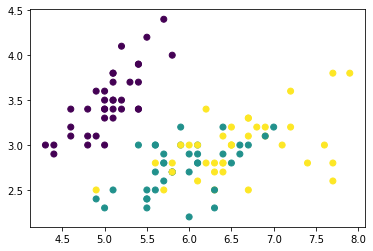

In [21]:
# визуализируем дискриминантную линию только по 2 признакам

plt.scatter(X_train['sepal_length_(cm)'], X_train['sepal_width_(cm)'], c=y_train)
plt.show()

In [22]:
lda.means_

array([[5.04722222, 3.48888889],
       [5.92162162, 2.75405405],
       [6.55128205, 2.96666667]])

<ipython-input-55-9d2c01d66edc>:19: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, Z, cmap = 'red_blue_classes',


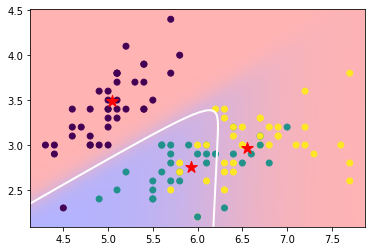

In [55]:
# сам scatter plot
plt.scatter(X_train['sepal_length_(cm)'], X_train['sepal_width_(cm)'], c = y_train)

# центроиды
plt.scatter(lda.means_[:, 0], lda.means_[:, 1], c = 'r', s = 150, marker = '*')

# делаем условную "сетку"
nx, ny = 200, 100
x_min, x_max = plt.xlim()
y_min, y_max = plt.ylim()
xx, yy = np.meshgrid(np.linspace(x_min, x_max, nx),
                         np.linspace(y_min, y_max, ny))

# предсказываем класс каждой точки нашей сетки
Z = lda.predict_proba(np.c_[xx.ravel(), yy.ravel()])
Z = Z[:, 1].reshape(xx.shape)

# закрашиваем классы разными цветами
plt.pcolormesh(xx, yy, Z, cmap = 'red_blue_classes',
                   norm=colors.Normalize(0., 1.), zorder = -1)

# отделяем друг от друга
plt.contour(xx, yy, Z, [0.5], linewidths = 2., colors = 'white');

In [27]:
# какая будет точность?

accuracy_score(y_test, lda.predict(X_test))

0.8157894736842105

# Логистическая модель
<a id='task3'></a>

In [56]:
# заменим модель на логистическую регресиию

from sklearn.linear_model import LogisticRegression

In [57]:
lr = LogisticRegression()

In [58]:
lr.fit(X_train, y_train)

LogisticRegression()

In [59]:
lr.predict(X_train)

array([1, 0, 2, 0, 0, 2, 2, 1, 1, 0, 1, 0, 2, 2, 1, 1, 0, 2, 0, 2, 0, 1,
       1, 0, 0, 0, 2, 1, 0, 2, 0, 2, 1, 0, 0, 2, 2, 2, 0, 0, 0, 1, 2, 1,
       2, 1, 2, 0, 2, 1, 2, 0, 2, 2, 2, 1, 1, 0, 2, 2, 1, 1, 2, 2, 2, 0,
       0, 2, 2, 0, 0, 2, 0, 2, 0, 1, 1, 2, 0, 2, 2, 1, 2, 1, 1, 2, 0, 1,
       0, 2, 2, 0, 0, 0, 2, 0, 0, 0, 0, 1, 0, 1, 0, 2, 0, 1, 1, 1, 1, 2,
       2, 2])

In [60]:
accuracy_score(y_test, lr.predict(X_test))

0.7631578947368421

In [61]:
lr.coef_

array([[-2.52105069,  2.05130005],
       [ 0.48367682, -1.51260273],
       [ 2.03737387, -0.53869732]])

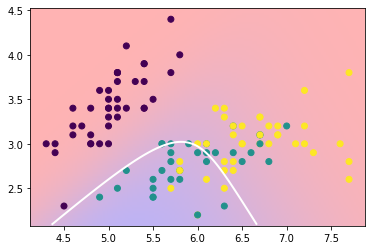

In [64]:
plt.scatter(X_train['sepal_length_(cm)'], X_train['sepal_width_(cm)'], c=y_train)

nx, ny = 200, 100
x_min, x_max = plt.xlim()
y_min, y_max = plt.ylim()
xx, yy = np.meshgrid(np.linspace(x_min, x_max, nx),
                         np.linspace(y_min, y_max, ny))
Z = lr.predict_proba(np.c_[xx.ravel(), yy.ravel()])
Z = Z[:, 1].reshape(xx.shape)
plt.pcolormesh(xx, yy, Z, cmap='red_blue_classes',
                   norm=colors.Normalize(0., 1.), zorder=-1, shading='auto')
plt.contour(xx, yy, Z, [0.5], linewidths=2., colors='white')

plt.show()

# Кластеризация
<a id='task4'></a>

In [68]:
# приведем данные к единому масштабу

from sklearn.preprocessing import StandardScaler

In [69]:
scaler = StandardScaler()

In [70]:
# fit-transform сразу обучается и преобразует данные

X_scaled = scaler.fit_transform(data[['sepal_length_(cm)', 'sepal_width_(cm)']])

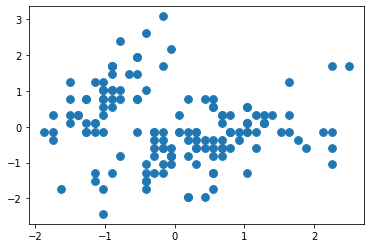

In [71]:
plt.scatter(X_scaled[:, 0], X_scaled[:, 1],cmap='autumn', s=60);

In [72]:
from sklearn.cluster import KMeans

In [73]:
# явно указываем количество кластеров 

kmeans = KMeans(n_clusters=2)

# fit_predict обучается на данных и каждому объекту присваивает кластер

clusters = kmeans.fit_predict(X_scaled)
clusters

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

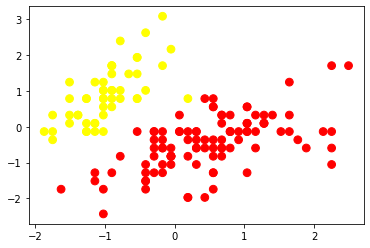

In [74]:
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], cmap='autumn', c=clusters, s=60);

In [75]:
# строим график локтя

# создаем список для инерции

k_inertia = []

# задаем диапазон кластеров
ks = range(1, 20)

for k in ks:
    clf_kmeans = KMeans(n_clusters=k)
    clusters_kmeans = clf_kmeans.fit_predict(X_scaled)
    
    # добавляем инерцию каждой модели в список
    k_inertia.append(clf_kmeans.inertia_)

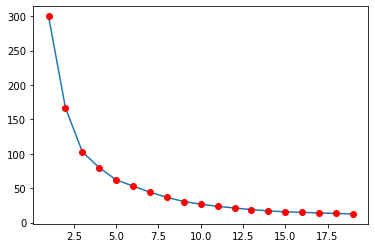

In [76]:
plt.plot(ks, k_inertia)
plt.plot(ks, k_inertia ,'ro')

In [77]:
from scipy.spatial.distance import pdist
from scipy.cluster import hierarchy

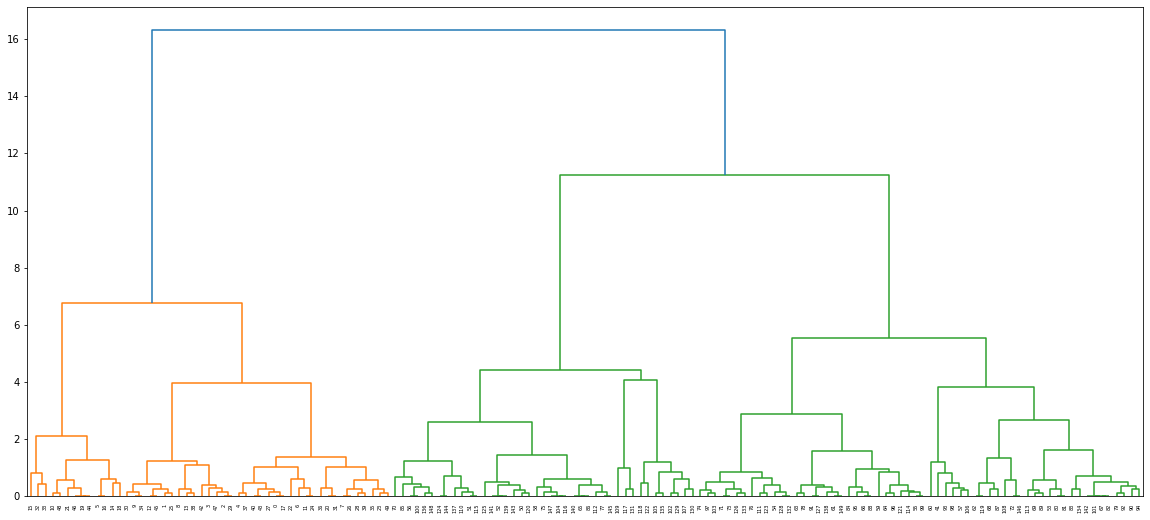

In [79]:
# строим дендрограмму

distance_mat = pdist(X_scaled) # pdist посчитает нам матрицу попарных расстояний между точками

# Z = hierarchy.linkage(distance_mat) # linkage — реализация агломеративного алгоритма

Z = hierarchy.linkage(distance_mat, 'ward')
plt.figure(figsize=(20, 9))
dn = hierarchy.dendrogram(Z)

In [80]:
# делаем уже кластеризацию по факту

from sklearn.cluster import AgglomerativeClustering

In [81]:
aglo = AgglomerativeClustering(n_clusters=2)
clusters = aglo.fit_predict(X_scaled)
clusters

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

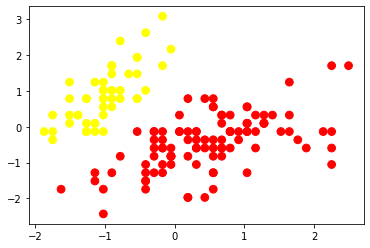

In [83]:
plt.scatter(X_scaled[:, 0], X_scaled[:, 1],cmap='autumn', c=clusters, s=60);

### Вывод: 
Оптимальное число кластеров 2

# Решающие деревья
<a id='task5'></a>

In [87]:
from matplotlib.colors import ListedColormap
from sklearn import metrics, tree 
from sklearn.datasets import load_iris
import numpy as np
import pandas as pd

In [88]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [89]:
colors = ListedColormap(['red', 'blue', 'yellow'])
light_colors = ListedColormap(['lightcoral', 'lightblue', 'lightyellow'])

In [90]:
iris = load_iris()

In [91]:
# загружаем данные в датафрейм

data = pd.DataFrame(iris.data, columns=iris.feature_names)
variety = iris.target

In [92]:
# усовершенствуем названия столбцов для удобной работы с ними, заменим пробел на нижнее подчеркивание

for col in data.columns :
    if ' ' in col:
        data.rename({col:col.replace(' ', '_')}, inplace=True, axis=1)

In [93]:
data = data[['sepal_length_(cm)', 'sepal_width_(cm)']]

In [94]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data, 
                                                    variety, test_size = 0.25)

In [95]:
clf = tree.DecisionTreeClassifier(random_state=1)
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

In [96]:
predictions = clf.predict(X_test)
metrics.accuracy_score(y_test, predictions)

0.5263157894736842

Правильно оцениваем примено 52 % наших данных.

In [97]:
predictions

array([1, 1, 2, 1, 0, 0, 0, 1, 1, 2, 1, 1, 1, 1, 2, 2, 1, 0, 1, 1, 2, 1,
       1, 2, 0, 1, 1, 2, 1, 2, 1, 0, 1, 1, 1, 0, 0, 0])

### Разделяющая поверхность

In [98]:
def get_meshgrid(data, step=.05, border=.5,):
    x_min, x_max = data[:, 0].min() - border, data[:, 0].max() + border
    y_min, y_max = data[:, 1].min() - border, data[:, 1].max() + border
    return np.meshgrid(np.arange(x_min, x_max, step), np.arange(y_min, y_max, step))

In [99]:
def plot_decision_surface(estimator, train_data, train_labels, test_data, test_labels, 
                          colors = colors, light_colors = light_colors):
    #fit model
    estimator.fit(train_data, train_labels)
    
    #set figure size
    pyplot.figure(figsize = (16, 6))
    
    #plot decision surface on the train data 
    pyplot.subplot(1,2,1)
    xx, yy = get_meshgrid(train_data)
    mesh_predictions = np.array(estimator.predict(np.c_[xx.ravel(), yy.ravel()])).reshape(xx.shape)
    pyplot.pcolormesh(xx, yy, mesh_predictions, cmap = light_colors)
    pyplot.scatter(train_data[:, 0], train_data[:, 1], c = train_labels, s = 100, cmap = colors)
    pyplot.title('Train data, accuracy={:.2f}'.format(metrics.accuracy_score(train_labels, estimator.predict(train_data))))
    
    #plot decision surface on the test data
    pyplot.subplot(1,2,2)
    pyplot.pcolormesh(xx, yy, mesh_predictions, cmap = light_colors)
    pyplot.scatter(test_data[:, 0], test_data[:, 1], c = test_labels, s = 100, cmap = colors)
    pyplot.title('Test data, accuracy={:.2f}'.format(metrics.accuracy_score(test_labels, estimator.predict(test_data))))

In [100]:
X_train = X_train.values
X_test = X_test.values

<ipython-input-99-5f89f08bf2a5>:13: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  pyplot.pcolormesh(xx, yy, mesh_predictions, cmap = light_colors)
<ipython-input-99-5f89f08bf2a5>:19: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  pyplot.pcolormesh(xx, yy, mesh_predictions, cmap = light_colors)


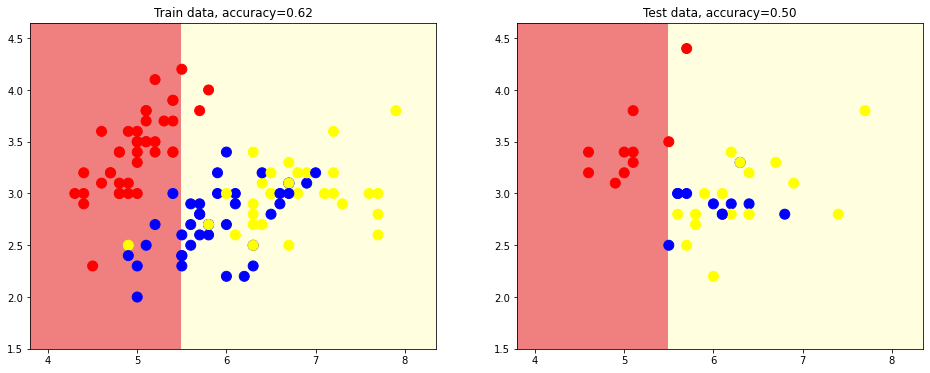

In [101]:
estimator = tree.DecisionTreeClassifier(random_state = 1, max_depth = 1)

plot_decision_surface(estimator, X_train, y_train, X_test, y_test)

Два признака недостаточно для классификации.

<ipython-input-99-5f89f08bf2a5>:13: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  pyplot.pcolormesh(xx, yy, mesh_predictions, cmap = light_colors)
<ipython-input-99-5f89f08bf2a5>:19: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  pyplot.pcolormesh(xx, yy, mesh_predictions, cmap = light_colors)


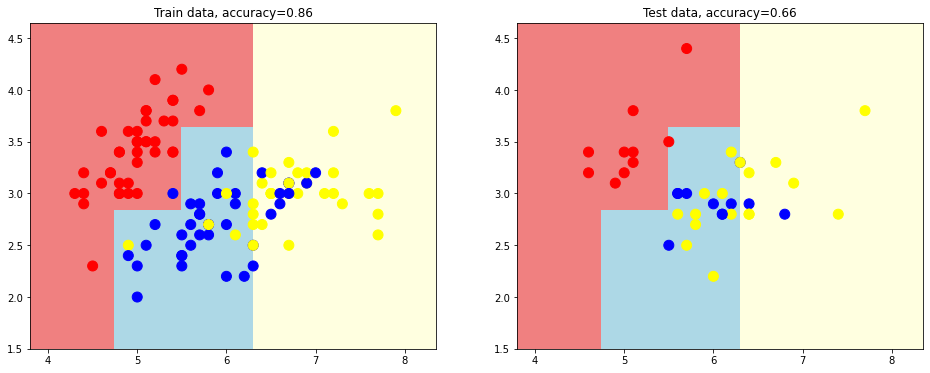

In [102]:
estimator = tree.DecisionTreeClassifier(random_state = 1, max_depth = 3)

plot_decision_surface(estimator, X_train, y_train, X_test, y_test)

<ipython-input-99-5f89f08bf2a5>:13: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  pyplot.pcolormesh(xx, yy, mesh_predictions, cmap = light_colors)
<ipython-input-99-5f89f08bf2a5>:19: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  pyplot.pcolormesh(xx, yy, mesh_predictions, cmap = light_colors)


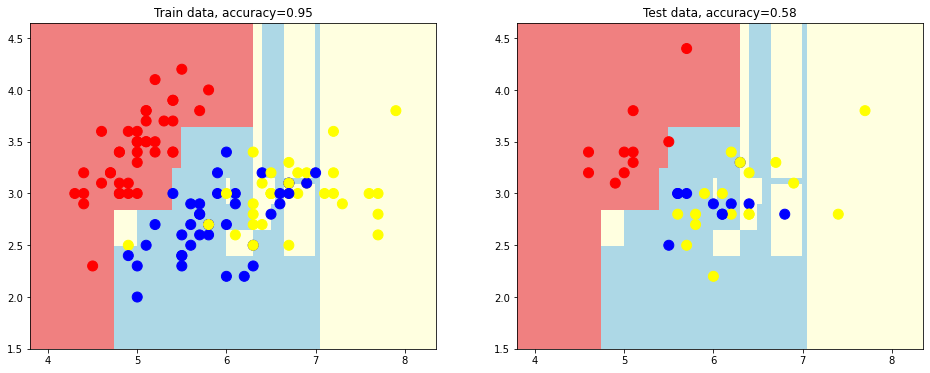

In [103]:
estimator = tree.DecisionTreeClassifier(random_state = 1, max_depth = 10)

plot_decision_surface(estimator, X_train, y_train, X_test, y_test)

<ipython-input-99-5f89f08bf2a5>:13: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  pyplot.pcolormesh(xx, yy, mesh_predictions, cmap = light_colors)
<ipython-input-99-5f89f08bf2a5>:19: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  pyplot.pcolormesh(xx, yy, mesh_predictions, cmap = light_colors)


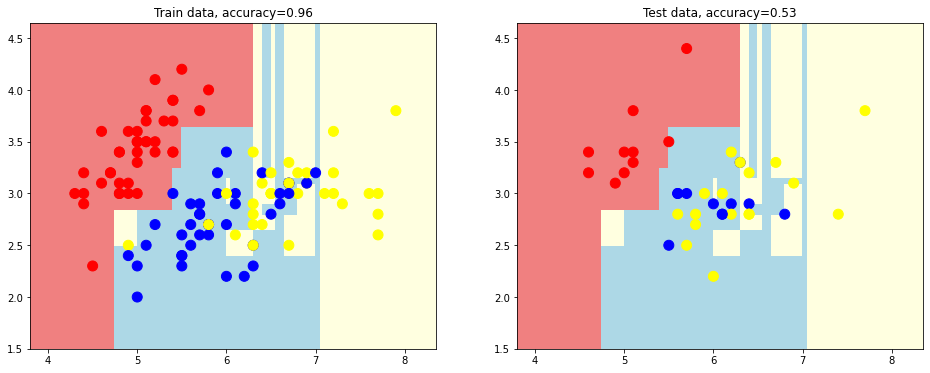

In [104]:
estimator = tree.DecisionTreeClassifier(random_state = 1)

plot_decision_surface(estimator, X_train, y_train, X_test, y_test)

<ipython-input-99-5f89f08bf2a5>:13: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  pyplot.pcolormesh(xx, yy, mesh_predictions, cmap = light_colors)
<ipython-input-99-5f89f08bf2a5>:19: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  pyplot.pcolormesh(xx, yy, mesh_predictions, cmap = light_colors)


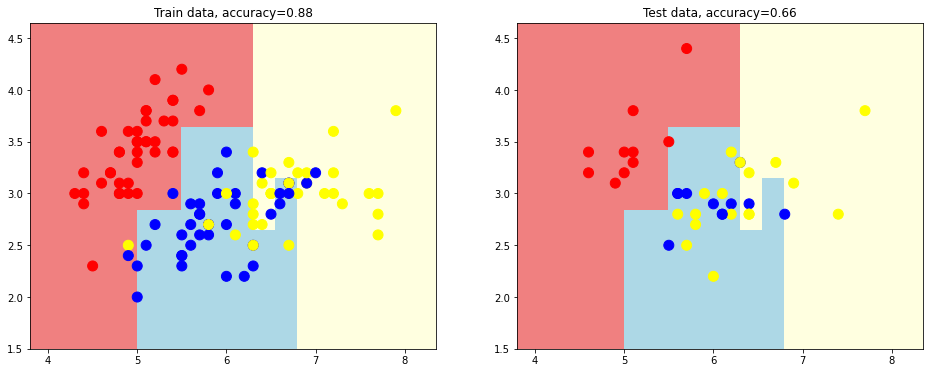

In [105]:
estimator = tree.DecisionTreeClassifier(random_state = 1, min_samples_leaf = 3)

plot_decision_surface(estimator, X_train, y_train, X_test, y_test)

<ipython-input-99-5f89f08bf2a5>:13: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  pyplot.pcolormesh(xx, yy, mesh_predictions, cmap = light_colors)
<ipython-input-99-5f89f08bf2a5>:19: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  pyplot.pcolormesh(xx, yy, mesh_predictions, cmap = light_colors)


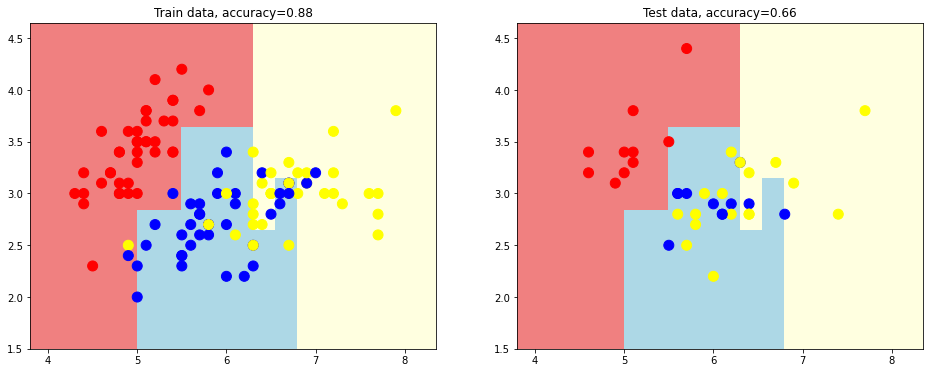

In [106]:
estimator = tree.DecisionTreeClassifier(random_state = 1, min_samples_leaf = 3)

plot_decision_surface(estimator, X_train, y_train, X_test, y_test)

Данная модель лучше покачеству на обучающей выборке, и хуже на тестовой, увеличение глубины дерева положительно сказывается на качестве модели, но мы сталкиваемся с переобучением, чтобы улучшить этот момент, ограничиваем ветвление, тем не менее нашей модели есть куда рости, так как мы получаем средний результат.